# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# !curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-07-14 09:54:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.128.9.27, 34.128.9.59, 34.128.10.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.128.9.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  9.37MB/s    in 12s     

2025-07-14 09:54:54 (8.48 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [6]:
!ls pizza_steak
# !dir pizza_steak

test  train


In [7]:
!ls pizza_steak/train/
# !dir pizza_steak\train\

pizza  steak


In [8]:
!ls pizza_steak/train/steak
# !dir pizza_steak\train\steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [9]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [10]:
!ls -la pizza_steak
# !dir /a pizza_steak

total 16
drwxr-xr-x 4 administrator administrator 4096 Jul 14 09:54 .
drwxr-xr-x 6 administrator administrator 4096 Jul 15 08:27 ..
drwxr-xr-x 4 administrator administrator 4096 Jul 14 09:54 test
drwxr-xr-x 4 administrator administrator 4096 Jul 14 09:54 train


In [11]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [12]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [13]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # Show the shape of the image
    
    return img

['168879.jpg']
Image shape: (384, 512, 3)


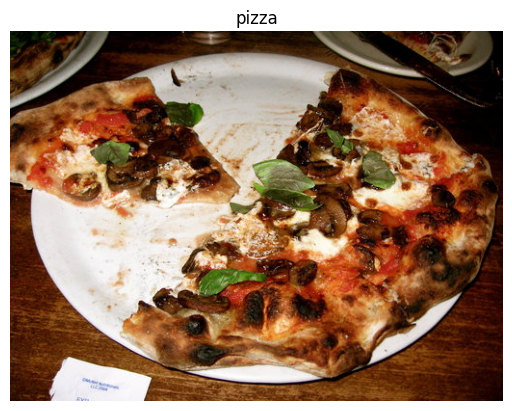

In [14]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
224, 224, 3

(224, 224, 3)

In [15]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[10, 30,  3],
        [ 9, 29,  2],
        [11, 31,  6],
        ...,
        [ 0,  0,  4],
        [ 1,  0,  4],
        [ 1,  0,  5]],

       [[14, 29,  6],
        [11, 26,  3],
        [ 8, 23,  2],
        ...,
        [ 0,  0,  2],
        [ 1,  0,  2],
        [ 1,  0,  4]],

       [[ 8, 21,  3],
        [ 6, 19,  1],
        [ 2, 13,  0],
        ...,
        [ 0,  0,  2],
        [ 1,  0,  2],
        [ 1,  0,  4]],

       ...,

       [[43, 11,  0],
        [44, 12,  1],
        [44, 14,  3],
        ...,
        [20,  1,  3],
        [20,  0,  2],
        [18,  0,  0]],

       [[40,  6,  0],
        [42,  8,  0],
        [43, 10,  3],
        ...,
        [20,  1,  3],
        [18,  0,  1],
        [16,  0,  0]],

       [[39,  2,  0],
        [41,  4,  0],
        [43,  8,  2],
        ...,
        [21,  2,  4],
        [18,  0,  3],
        [17,  0,  2]]], dtype=uint8)>

In [16]:
# View the image shape
img.shape # returns width, height, colour channels

(384, 512, 3)

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [17]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.03921569, 0.11764706, 0.01176471],
        [0.03529412, 0.11372549, 0.00784314],
        [0.04313725, 0.12156863, 0.02352941],
        ...,
        [0.        , 0.        , 0.01568627],
        [0.00392157, 0.        , 0.01568627],
        [0.00392157, 0.        , 0.01960784]],

       [[0.05490196, 0.11372549, 0.02352941],
        [0.04313725, 0.10196078, 0.01176471],
        [0.03137255, 0.09019608, 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.00392157, 0.        , 0.00784314],
        [0.00392157, 0.        , 0.01568627]],

       [[0.03137255, 0.08235294, 0.01176471],
        [0.02352941, 0.0745098 , 0.00392157],
        [0.00784314, 0.05098039, 0.        ],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.00392157, 0.        , 0.00784314],
        [0.00392157, 0.        , 0.01568627]],

       ...,

       [[0.16862745, 0.04313725, 0.        ],
        [0.17254902, 0.04705882, 0.00392157],
        [0.17254902, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2025-07-15 08:28:15.899950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type XPU is enabled.


onednn_verbose,v1,info,oneDNN v3.8.0 (commit 5dc2e69f319ab59520c9096436488c11ab86fd93)
onednn_verbose,v1,info,cpu,runtime:DPC++,nthr:1
onednn_verbose,v1,info,cpu,isa:Intel AVX2 with Intel DL Boost, float16 and bfloat16 support
onednn_verbose,v1,info,gpu,runtime:DPC++
onednn_verbose,v1,info,cpu,engine,sycl cpu device count:1 
onednn_verbose,v1,info,cpu,engine,0,backend:OpenCL,name:Intel(R) Core(TM) Ultra 7 258V,driver_version:2025.20.6
onednn_verbose,v1,info,gpu,engine,sycl gpu device count:1 
onednn_verbose,v1,info,gpu,engine,0,backend:Level Zero,name:Intel(R) Graphics [0x64a0],driver_version:1.6.33944,binary_kernels:enabled
onednn_verbose,v1,info,graph,backend,0:dnnl_backend
onednn_verbose,v1,info,experimental features are enabled
onednn_verbose,v1,info,use batch_normalization stats one pass is enabled
onednn_verbose,v1,info,GPU convolution v2 is disabled
onednn_verbose,v1,info,experimental functionality for sparse domain is enabled
onednn_verbose,v1,primitive,info,template:operation,

In [19]:
len(train_data)

47

In [20]:
1500/32

46.875

In [21]:
# Get a model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

🛠️ **Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.87053&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). 

In [22]:
train_data

In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model a replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 3s 58ms/step - loss: 0.7644 - accuracy: 0.5120 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - -6s -134575us/step - loss: 0.6322 - accuracy: 0.6187 - val_loss: 0.5930 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 2s 52ms/step - loss: 0.5872 - accuracy: 0.7300 - val_loss: 0.5619 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 2s 43ms/step - loss: 0.5638 - accuracy: 0.7593 - val_loss: 0.5571 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 3s 53ms/step - loss: 0.5481 - accuracy: 0.7607 - val_loss: 0.5840 - val_accuracy: 0.7660


In [21]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [22]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 3s 55ms/step - loss: 2.7506 - accuracy: 0.6433 - val_loss: 0.6236 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 3s 62ms/step - loss: 0.8013 - accuracy: 0.7013 - val_loss: 1.3292 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 2s 47ms/step - loss: 0.8197 - accuracy: 0.7260 - val_loss: 0.5012 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 3s 60ms/step - loss: 0.6015 - accuracy: 0.7493 - val_loss: 0.4591 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 2s 50ms/step - loss: 0.4867 - accuracy: 0.7860 - val_loss: 0.7663 - val_accuracy: 0.6360


In [23]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
15073201/31101

484.6532587376612

> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots cases, it is. But in this case, the difference here is the two different styles of model we're using. Where series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So an even though these are less learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

In [25]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3700079.jpg']
Image shape: (512, 512, 3)
['3042454.jpg']
Image shape: (512, 512, 3)


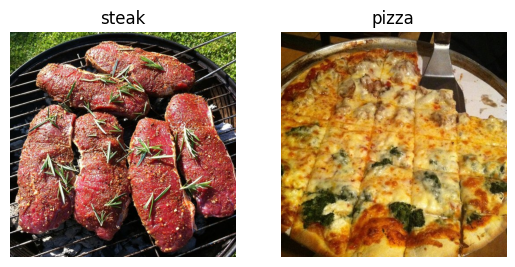

In [26]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [27]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?
Because 32 is good for your health... https://x.com/ylecun/status/989610208497360896

In [25]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), #Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of a train data batch
images, labels = train_data.next() # get  the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [31]:
# How many batches are there?
len(train_data)

47

In [32]:
1500/32

46.875

In [33]:
#Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [34]:
images[7].shape

(224, 224, 3)

In [35]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result that you set up when beginning a machine learning experiment and then as you experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [1]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential

2025-07-15 08:20:57.932872: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-15 08:20:57.983238: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-15 08:20:58.211625: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-15 08:20:58.211715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-15 08:20:58.254942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # the size of the sliding window going across an input
           strides=(1, 1), # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)

])

2025-07-15 08:21:08.556526: I tensorflow/core/common_runtime/next_pluggable_device/next_pluggable_device_factory.cc:118] Created 1 TensorFlow NextPluggableDevices. Physical device type: XPU


🛠️ **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes:
https://poloclub.github.io/cnn-explainer/

In [3]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [4]:
# Get a summary of our model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [27]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [28]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.9545 - accuracy: 0.6940 - val_loss: 0.4419 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 4s 80ms/step - loss: 0.4300 - accuracy: 0.8080 - val_loss: 0.3928 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.2992 - accuracy: 0.8933 - val_loss: 0.4000 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 4s 80ms/step - loss: 0.1541 - accuracy: 0.9540 - val_loss: 0.4004 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.0501 - accuracy: 0.9913 - val_loss: 0.4942 - val_accuracy: 0.8220
